<a href="https://colab.research.google.com/github/SoheeKim12/Machine_Learning_Study/blob/main/Decision_Tree_250422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정트리(Decision Tree)

# 1. 분류 예제 - 와인 데이터

In [43]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt

In [44]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

In [45]:
wine = load_wine()

In [46]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df # 3가지 종류에 대한 13가지 특성

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## 교차검증

### 전처리 없이 학습

In [47]:
model = DecisionTreeClassifier()

In [48]:
cross_val_score(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

array([0.94444444, 0.83333333, 0.88888889, 0.91428571, 0.82857143])

### 전처리 후 학습

차이가 크지 않음 -> 규칙을 통해 학습하는 형태이기 때문에

In [49]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [50]:
cross_val_score(
estimator=model,
X=wine.data, y=wine.target,
cv=5,
n_jobs=multiprocessing.cpu_count()
)

array([0.88888889, 0.77777778, 0.86111111, 0.91428571, 0.85714286])

## 학습된 결정트리 시각화

In [51]:
model = DecisionTreeClassifier()
model.fit(wine.data, wine.target)

DecisionTreeClassifier()

### 텍스트를 통한 시각화

In [52]:
r = tree.export_text(decision_tree=model, feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- alcohol <= 13.51
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.51
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- magnesium <= 98.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- magnesium >  98.50
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- flavanoids <= 0.90
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.90
|   |   |   |--- class: 1
|   |--- flavanoids >  2.17
|   |   |--- color_intensity <= 3.43
|   |  

### plot_tree를 통한 시각화

[Text(0.5657894736842105, 0.9166666666666666, 'x[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59.0, 71.0, 48.0]'),
 Text(0.34210526315789475, 0.75, 'x[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.45394736842105265, 0.8333333333333333, 'True  '),
 Text(0.21052631578947367, 0.5833333333333334, 'x[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'x[0] <= 13.515\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'x[6] <= 0.795

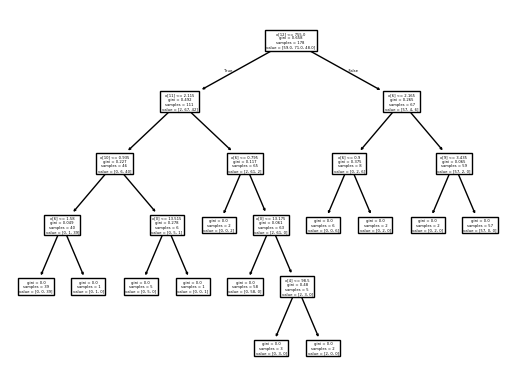

In [53]:
tree.plot_tree(model)

### graphviz를 통한 시각화

* gini: 지니 불순도(Gini impurity), 노드 내 클래스가 얼마나 섞여 있는지를 나타내는 지표 <br>
  - 0에 가까울수록 한 클래스만 존재함 (순수 노드)
  - 0.5 이상이면 여러 클래스가 섞여 있음<br>
* sample: 이 노드에 도달한 데이터 개수<br>
* value:  샘플이 각 클래스에 얼마나 속해 있는지

	DecisionTreeClassifier(criterion='entropy')

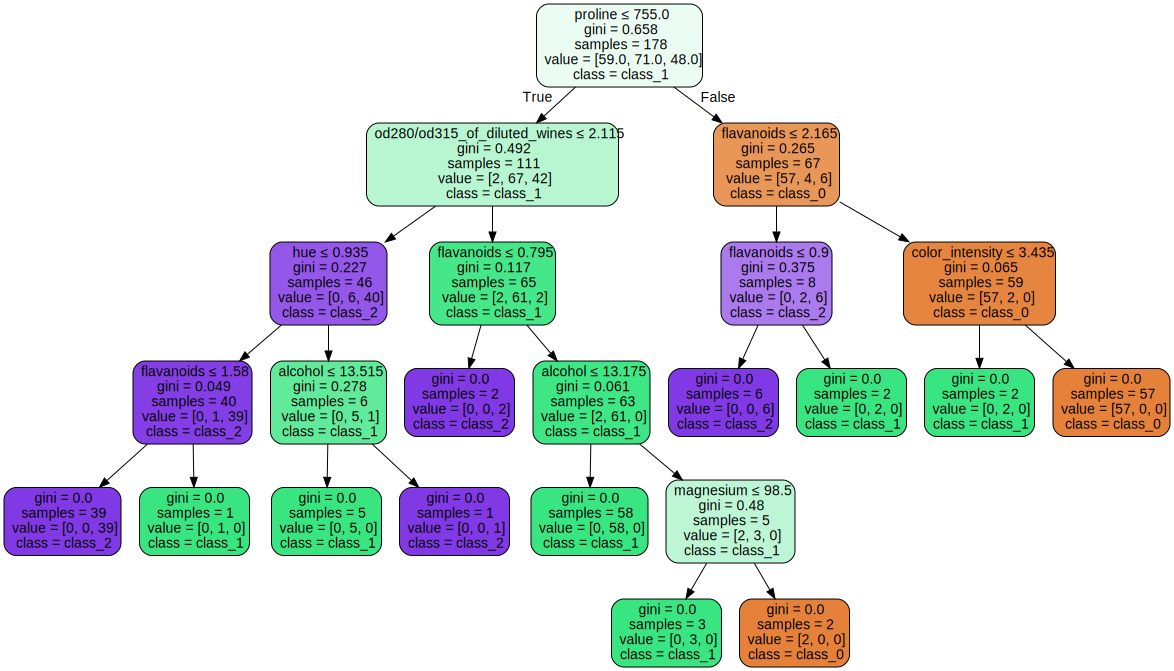

In [54]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=wine.feature_names,
                                class_names=wine.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph # 색깔정도: gini에 따라 표현됨, 0이면 더이상 나누는 값이 없음, 엔트로피가 최소가 될때까지

## 시각화

In [55]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

<ipython-input-56-7226afa451ad>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipython-input-56-7226afa451ad>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipython-input-56-7226afa451ad>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipython-input-56-7226afa451ad>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipython-input-56-7226afa451ad>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipyt

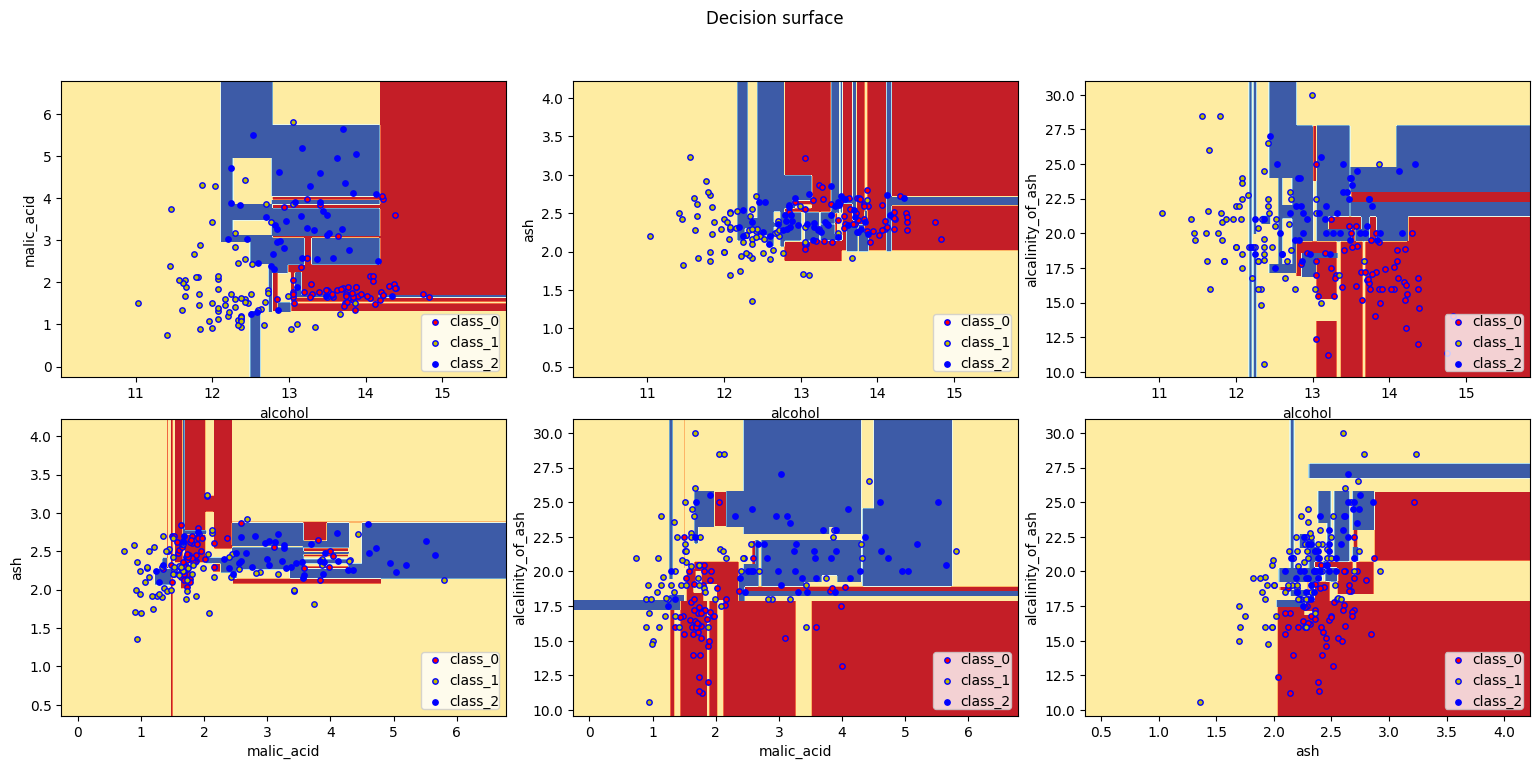

In [56]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = wine.data[:, pair]
  y = wine.target

  model = DecisionTreeClassifier()
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

  plt.suptitle("Decision surface")
  plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  plt.axis('tight') # 하이퍼파라미터로 최대 depth 지정 필요

##하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

<ipython-input-57-eec8d0f41bc6>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipython-input-57-eec8d0f41bc6>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipython-input-57-eec8d0f41bc6>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipython-input-57-eec8d0f41bc6>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipython-input-57-eec8d0f41bc6>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
<ipyt

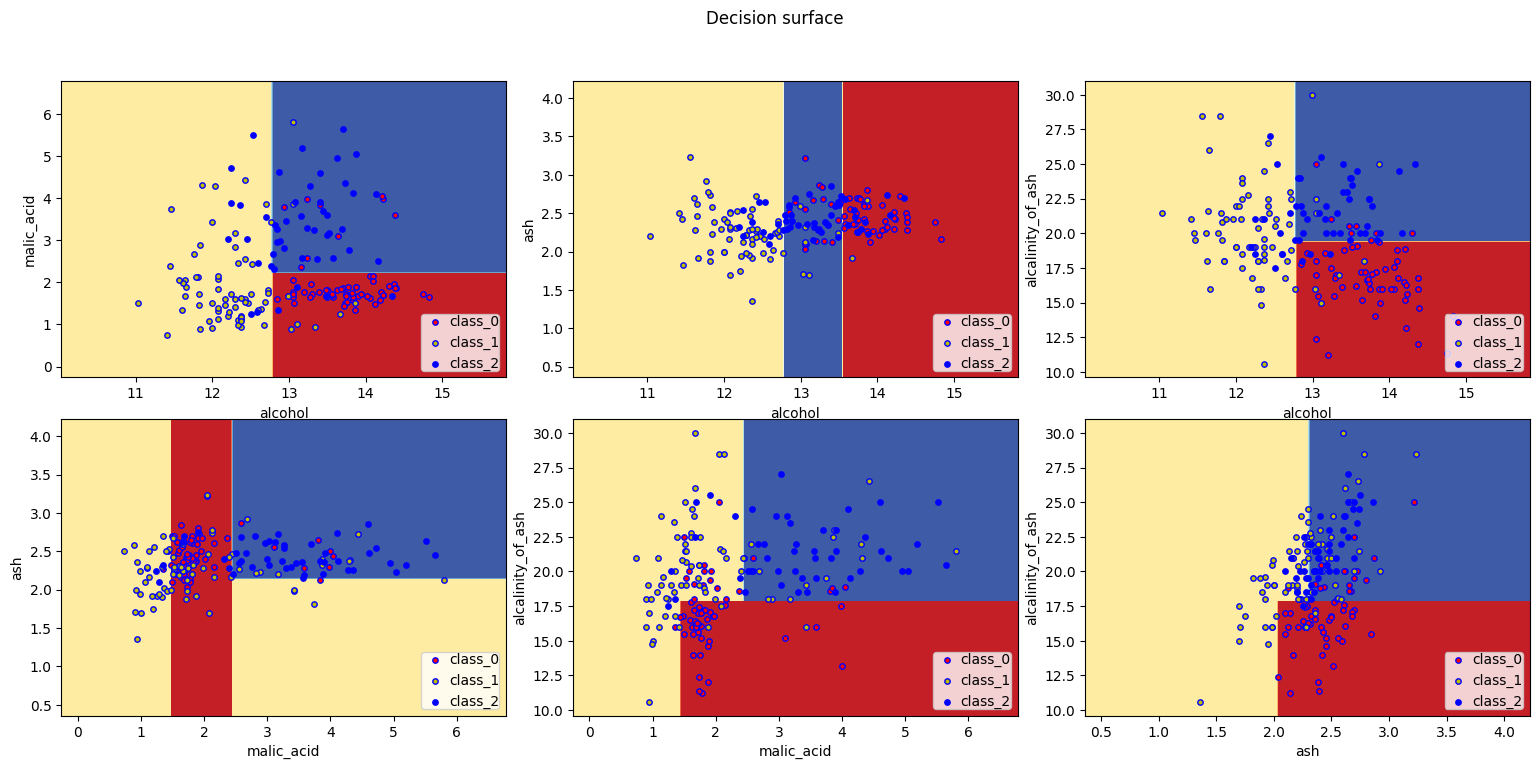

In [57]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
  X = wine.data[:, pair]
  y = wine.target

  model = DecisionTreeClassifier(max_depth=2)
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

  plt.suptitle("Decision surface")
  plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  plt.axis('tight') # 결과는 떨어지나 구분이 쉬움.

# 2. 분류 예제 - 유방암 데이터

In [58]:
cancer = load_breast_cancer()

In [59]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 교차 검증

#### 전처리 없이 학습

In [60]:
model = DecisionTreeClassifier()

In [61]:
cross_val_score(estimator=model,
                X=cancer.data, y=cancer.target,
                cv=5,
                n_jobs=multiprocessing.cpu_count())

array([0.9122807 , 0.89473684, 0.90350877, 0.92982456, 0.89380531])

### 전처리 후 학습

In [62]:
model = make_pipeline(StandardScaler(),
                      DecisionTreeClassifier())

In [63]:
cross_val_score(estimator=model,
                X=cancer.data, y=cancer.target,
                cv=5,
                n_jobs=multiprocessing.cpu_count()) # 차이가 크지 않음 -> 전처리는 큰 영향이 없다

array([0.90350877, 0.9122807 , 0.92105263, 0.93859649, 0.88495575])

## 학습된 결정트리 시각화

In [64]:
model = DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

### 텍스트를 통한 시각화

In [65]:
r = tree.export_text(decision_tree=model)
print(r) # 보기어려움

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_13 <= 91.56
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_27 <= 0.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_27 >  0.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_10 <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_10 >  0.42
|   |   |   |   |   |--- feature_25 <= 0.08
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_25 >  0.08
|   |   |   |   |   |   |--- class: 1
|   |   

### plot_tree를 통한 시각화

[Text(0.625, 0.9375, 'x[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.40625, 0.8125, 'x[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.515625, 0.875, 'True  '),
 Text(0.234375, 0.6875, 'x[13] <= 91.555\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.203125, 0.5625, 'x[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 'x[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'x[27] <= 0.101\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'x[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'x[21] <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue 

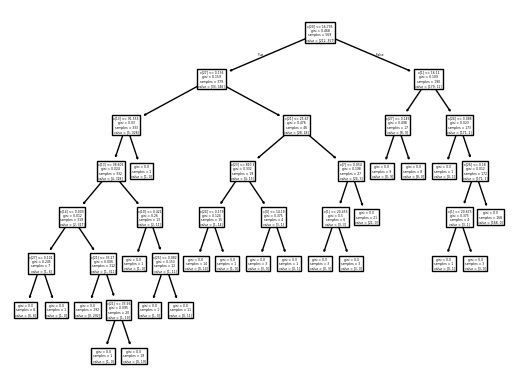

In [66]:
tree.plot_tree(model) # depth 7개 확인 -> 보기어려움

### graphviz를 통한 시각화

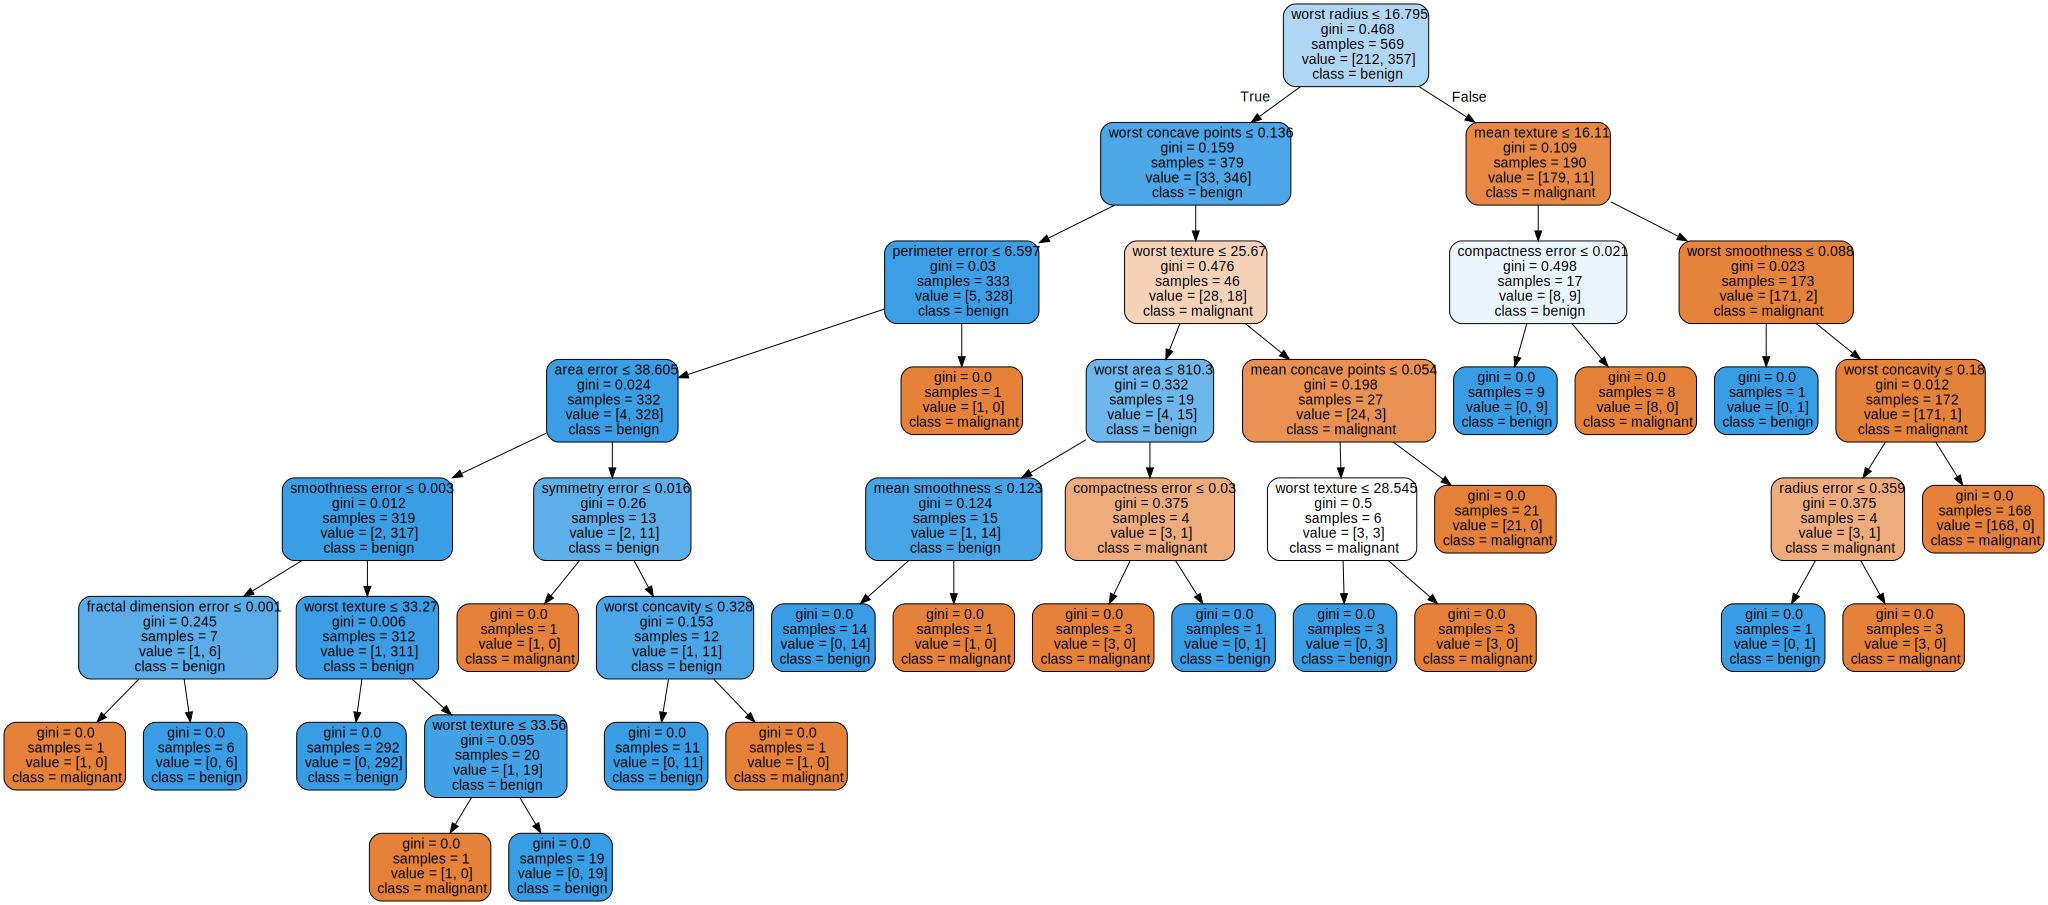

In [14]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph # 악성 or 양성을 구분해줌, 설명이 쉬움

## 시각화

In [67]:
n_classes = 2 # 악성 또는 양성
plot_colors = 'ryb'
plot_step = 0.02

<ipython-input-68-2ad1c6d343a5>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
<ipython-input-68-2ad1c6d343a5>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
<ipython-input-68-2ad1c6d343a5>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],


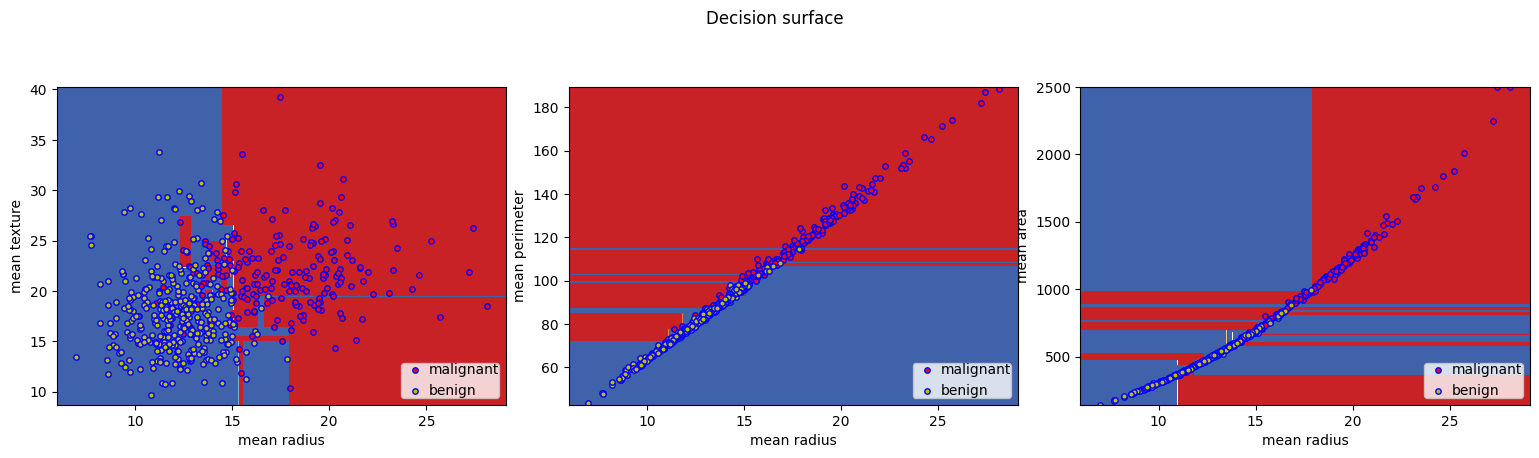

In [68]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
  X = cancer.data[:, pair]
  y = cancer.target

  model = DecisionTreeClassifier()
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

  plt.suptitle("Decision surface")
  plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  plt.axis('tight')

In [ ]:
plt.figure(figsize=(16, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
  X = cancer.data[:, pair]
  y = cancer.target

  model = DecisionTreeClassifier(max_depth=2)
  model = model.fit(X, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
  y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])
  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

  plt.suptitle("Decision surface")
  plt.legend(loc='lower right', borderpad=0, handletextpad=0)
  plt.axis('tight') # 세션 오류 plt.ylabel(cancer.feature_names[pair[1]])
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
                            cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

                              plt.suptitle("Decision surface")
                                plt.legend(loc='lower right', borderpad=0, handletextpad=0)
                                  plt.axis('tight') # 세션 끊김........

<ipython-input-10-0a5e0b6d3c97>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],
<ipython-input-10-0a5e0b6d3c97>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=cancer.target_names[i],


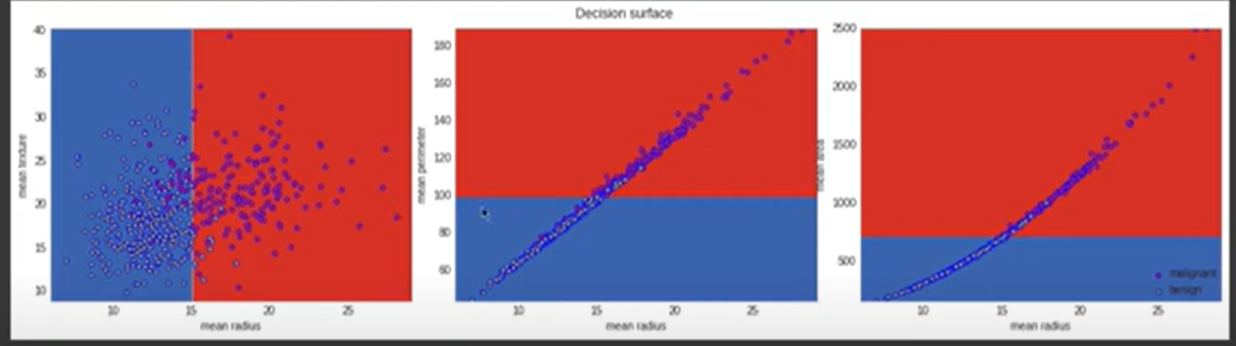

# 3. 회귀예제 - 보스턴

In [76]:
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
X = boston.drop(columns=['MEDV'])  # MEDV 컬럼을 제외한 나머지 변수들
y = boston['MEDV']  # MEDV 컬럼을 y로 설정

In [8]:
model = DecisionTreeRegressor()

In [12]:
# 전처리 없이
cross_val_score(estimator=model,
                X = boston.drop(columns=['MEDV']), y = boston['MEDV'],
                cv=5,
                n_jobs=multiprocessing.cpu_count())

array([ 0.61962078,  0.43526997,  0.64239599,  0.37312061, -1.46448973])

In [72]:
model = make_pipeline(StandardScaler(),
                      DecisionTreeRegressor())

In [73]:
# 전처리 후
cross_val_score(estimator=model,
                X = boston.drop(columns=['MEDV']), y = boston['MEDV'],
                cv=5,
                n_jobs=multiprocessing.cpu_count())

array([ 0.61558398,  0.66236028,  0.7047414 ,  0.38376753, -1.46615055])

In [74]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

[Text(0.5857142857142857, 0.9833333333333333, 'x[1] <= 696.25\nsquared_error = 0.234\nsamples = 569\nvalue = 0.627'),
 Text(0.3047619047619048, 0.95, 'x[1] <= 529.8\nsquared_error = 0.11\nsamples = 397\nvalue = 0.874'),
 Text(0.44523809523809527, 0.9666666666666666, 'True  '),
 Text(0.16666666666666666, 0.9166666666666666, 'x[1] <= 473.6\nsquared_error = 0.046\nsamples = 266\nvalue = 0.951'),
 Text(0.05714285714285714, 0.8833333333333333, 'x[0] <= 10.945\nsquared_error = 0.028\nsamples = 205\nvalue = 0.971'),
 Text(0.0380952380952381, 0.85, 'squared_error = 0.0\nsamples = 82\nvalue = 1.0'),
 Text(0.0761904761904762, 0.85, 'x[0] <= 10.955\nsquared_error = 0.046\nsamples = 123\nvalue = 0.951'),
 Text(0.05714285714285714, 0.8166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 0.0'),
 Text(0.09523809523809523, 0.8166666666666667, 'x[1] <= 363.6\nsquared_error = 0.039\nsamples = 122\nvalue = 0.959'),
 Text(0.0761904761904762, 0.7833333333333333, 'squared_error = 0.0\nsamples = 1\nva

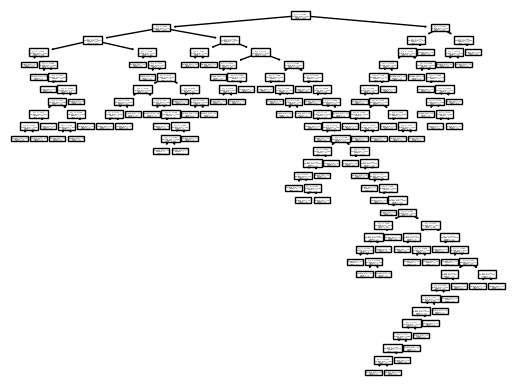

In [75]:
tree.plot_tree(model) # 과적합, 결과 좋지 않음

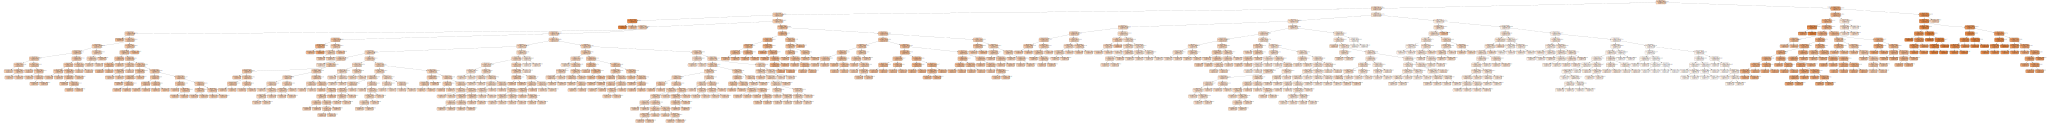

In [25]:
dot_data = tree.export_graphviz(decision_tree=model,
                                #feature_names=boston.columns,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph # 줄여도 엄청 많음, 회귀는 mse값으로 봄, 트리가 너무 커서 설명하기 어려움

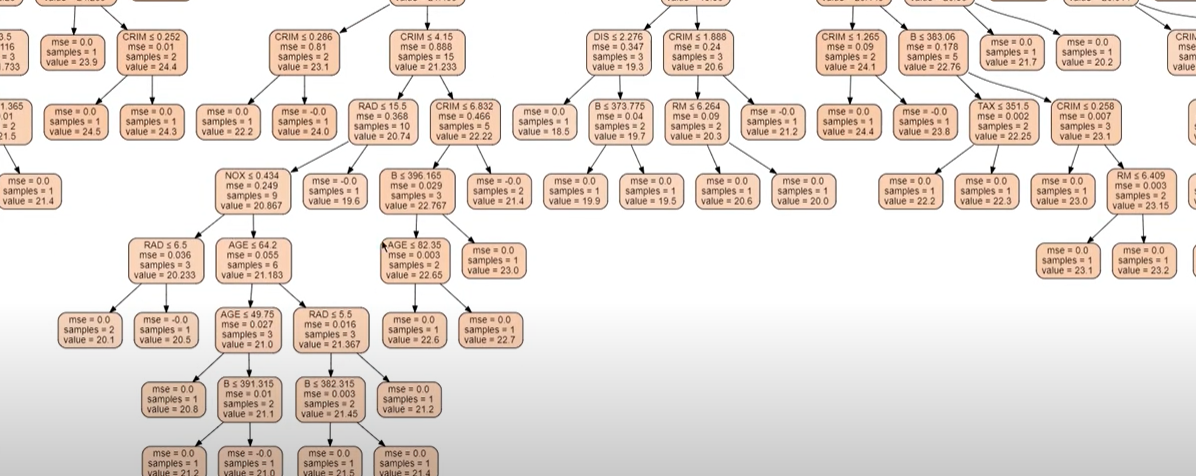

### 회귀식 시각화
crim: 과적합
zn, indus: 경계를 잘 못찾음


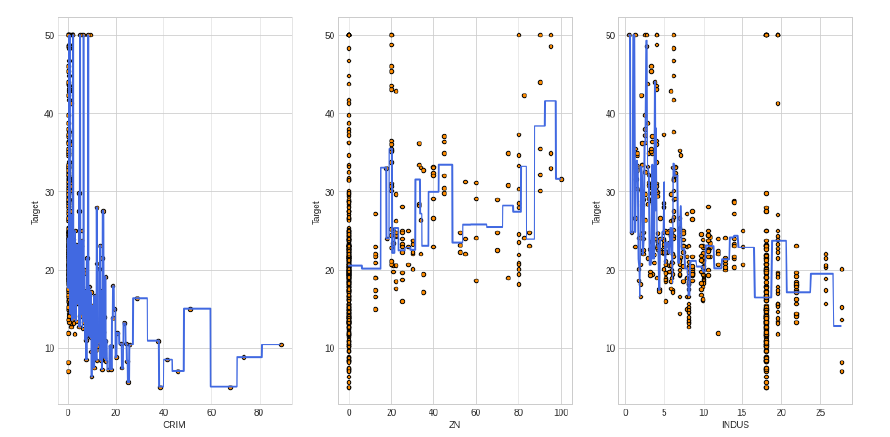

### 하이퍼파라미터를 변경해 보면서 결정경계의 변화 확인

max_depth=3으로 수정해서 봄, 연속적인 값을 예측할 때 구간별 평균을 예측하기 때문에  연속적인 선이 아닌 계단 형태(step function) 로 나타남

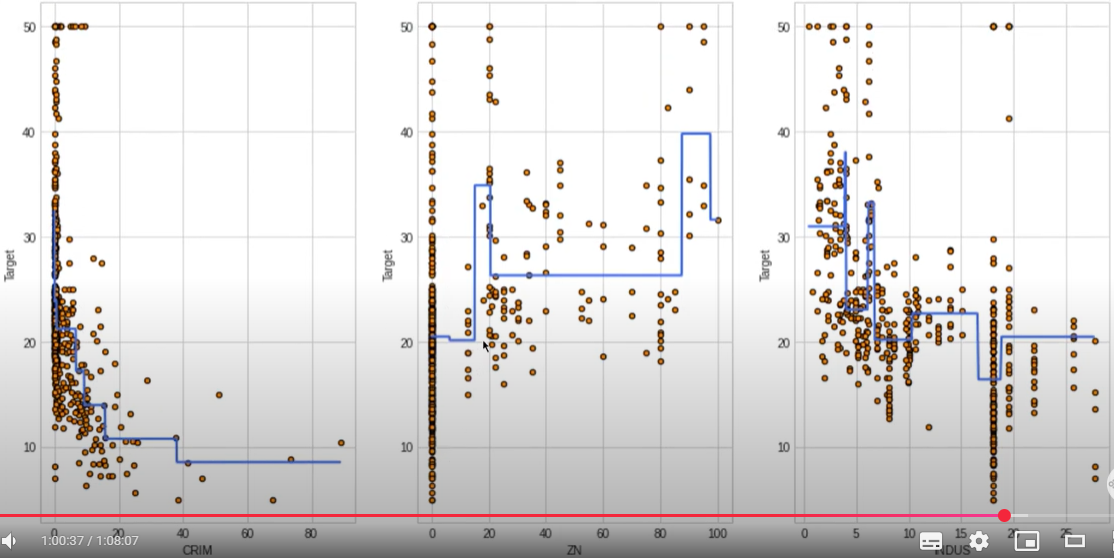